In [2]:
gpt_4o_sql_feature_bi = {'Accuracy': '0.9692 ± 0.0606', 'Hamming Loss': '0.0308 ± 0.0606',
                         'Precision (macro)': '0.6923 ± 0.4061', 'Recall (macro)': '0.7500 ± 0.4160',
                         'F1 Score (macro)': '0.7134 ± 0.4044'}
gpt_4o_sql_feature_dev = {'Accuracy': '0.9923 ± 0.0266', 'Hamming Loss': '0.0077 ± 0.0266',
                          'Precision (macro)': '0.6538 ± 0.4551', 'Recall (macro)': '0.6923 ± 0.4615',
                          'F1 Score (macro)': '0.6667 ± 0.4529'}
gpt_4o_sql_feature_engineering = {'Accuracy': '0.3769 ± 0.0697', 'Hamming Loss': '0.6231 ± 0.0697',
                                  'Precision (macro)': '0.6923 ± 0.4615', 'Recall (macro)': '0.1375 ± 0.1096',
                                  'F1 Score (macro)': '0.2254 ± 0.1707'}
gpt_4o_ml = {'Accuracy': '0.8923 ± 0.2051', 'Hamming Loss': '0.1077 ± 0.2051', 'Precision (macro)': '0.8492 ± 0.2806',
             'Recall (macro)': '0.9128 ± 0.2646', 'F1 Score (macro)': '0.8730 ± 0.2667'}

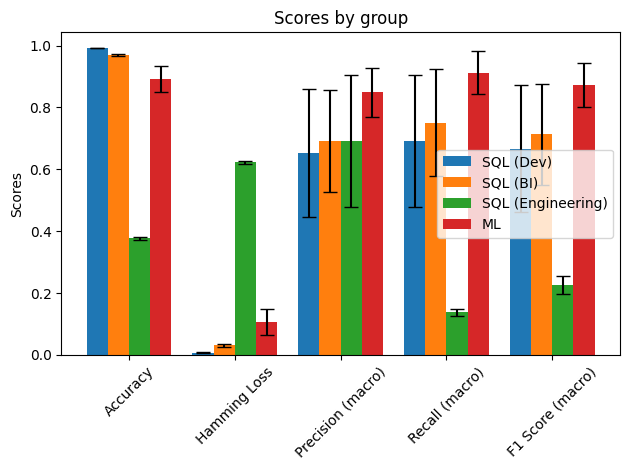

In [9]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(gpt_4o_sql_feature_bi.keys())

# Extracting mean and converting error to variance
dev = [float(gpt_4o_sql_feature_dev[label].split(' ± ')[0]) for label in labels]
dev_var = [float(gpt_4o_sql_feature_dev[label].split(' ± ')[1]) ** 2 for label in labels]
bi = [float(gpt_4o_sql_feature_bi[label].split(' ± ')[0]) for label in labels]
bi_var = [float(gpt_4o_sql_feature_bi[label].split(' ± ')[1]) ** 2 for label in labels]
ml = [float(gpt_4o_ml[label].split(' ± ')[0]) for label in labels]
ml_var = [float(gpt_4o_ml[label].split(' ± ')[1]) ** 2 for label in labels]
eng = [float(gpt_4o_sql_feature_engineering[label].split(' ± ')[0]) for label in labels]
eng_var = [float(gpt_4o_sql_feature_engineering[label].split(' ± ')[1]) ** 2 for label in labels]
# plot
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width / 2, dev, width, label='SQL (Dev)', yerr=dev_var, capsize=5)
rects2 = ax.bar(x - width / 2, bi, width, label='SQL (BI)', yerr=bi_var, capsize=5)
rects3 = ax.bar(x + width / 2, eng, width, label='SQL (Engineering)', yerr=eng_var, capsize=5)
rects4 = ax.bar(x + 3 * width / 2, ml, width, label='ML', yerr=ml_var, capsize=5)

# labels
ax.set_ylabel('Scores')
ax.set_title('Scores by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# legend
ax.legend()

# show
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()